# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [4]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE

    odlx = (x_lim[1]-x_lim[0])/grid[1]
    odly = (y_lim[1]-y_lim[0])/grid[0]
    rand_x = random_component * np.random.uniform(low = -0.5*odlx, high = 0.5*odlx, size = grid[0]*grid[1])
    rand_y = random_component * np.random.uniform(low = -0.5*odly, high = 0.5*odly, size = grid[0]*grid[1])
    x = np.linspace(x_lim[0]+0.5*odlx, x_lim[1]-0.5*odlx, grid[0])
    y = np.linspace(y_lim[0]+0.5*odly, y_lim[1]-0.5*odly, grid[1])
    xx, yy = np.meshgrid(x,y) 
    xx = xx.flatten() + rand_x
    yy = yy.flatten() + rand_y
        
    points = pd.DataFrame()
    points['X'] = xx
    points['Y'] = yy
    return points
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [5]:
# YOUR CODE HERE
fun = regular_on_rectangle(grid = [20,10], random_component = 0.5, x_lim = [0,20], y_lim = [0,10])
fun
#raise NotImplementedError()

,X,Y
0,1.111088,0.343623
1,2.113559,0.278860
2,3.357777,0.313583
3,4.206904,0.246802
4,5.166445,0.289544
...,...,...
195,15.027775,9.715841
196,15.974420,9.630426
197,17.104483,9.738242
198,18.542314,9.747073


#### c) Wizualizacja

(0.0, 10.0)

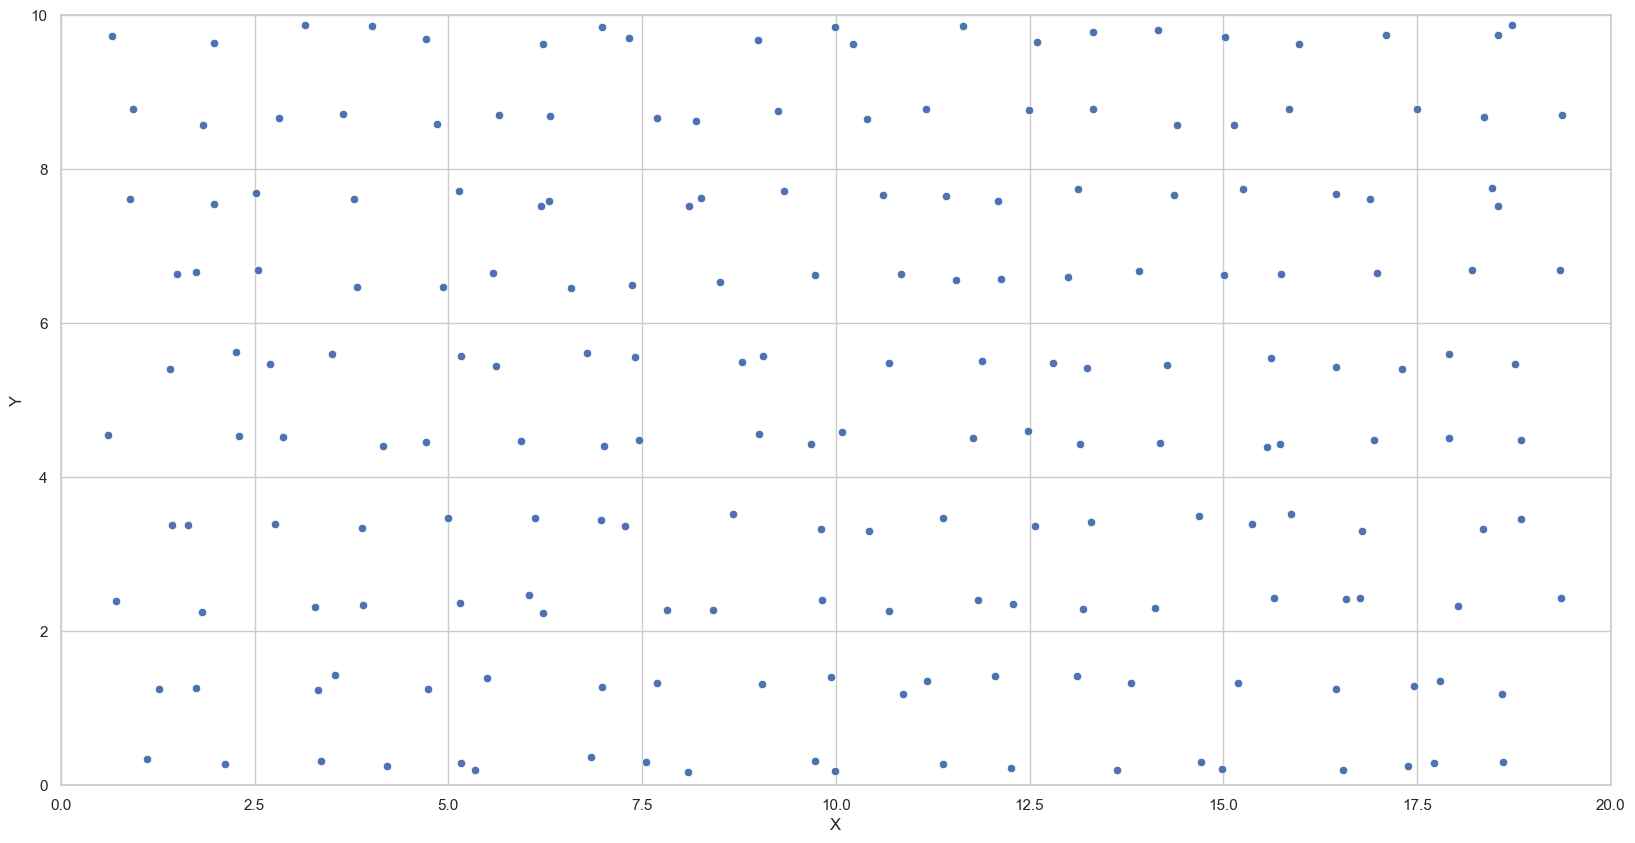

In [6]:
# YOUR CODE HERE
fig, axes = plt.subplots(1,1, figsize = (20,10))
sns.scatterplot(fun, x = fun['X'], y = fun['Y'], ax = axes) 
plt.xlim(0,20)
plt.ylim(0,10)

#raise NotImplementedError()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [7]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    area = (x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    n = area*intensity
    number = np.random.poisson(n)
    x = np.random.uniform(low = x_lim[0], high = x_lim[1], size = number)
    y = np.random.uniform(low = y_lim[0], high = y_lim[1], size = number)
    
    points = pd.DataFrame()
    points['X'] = x
    points['Y'] = y
    return points
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [8]:
# YOUR CODE HERE
fun2 = homogeneous_poisson_on_rectangle(intensity = 10, x_lim = [0,20], y_lim = [0,10])
#raise NotImplementedError()

#### c) Wizualizacja

(0.0, 10.0)

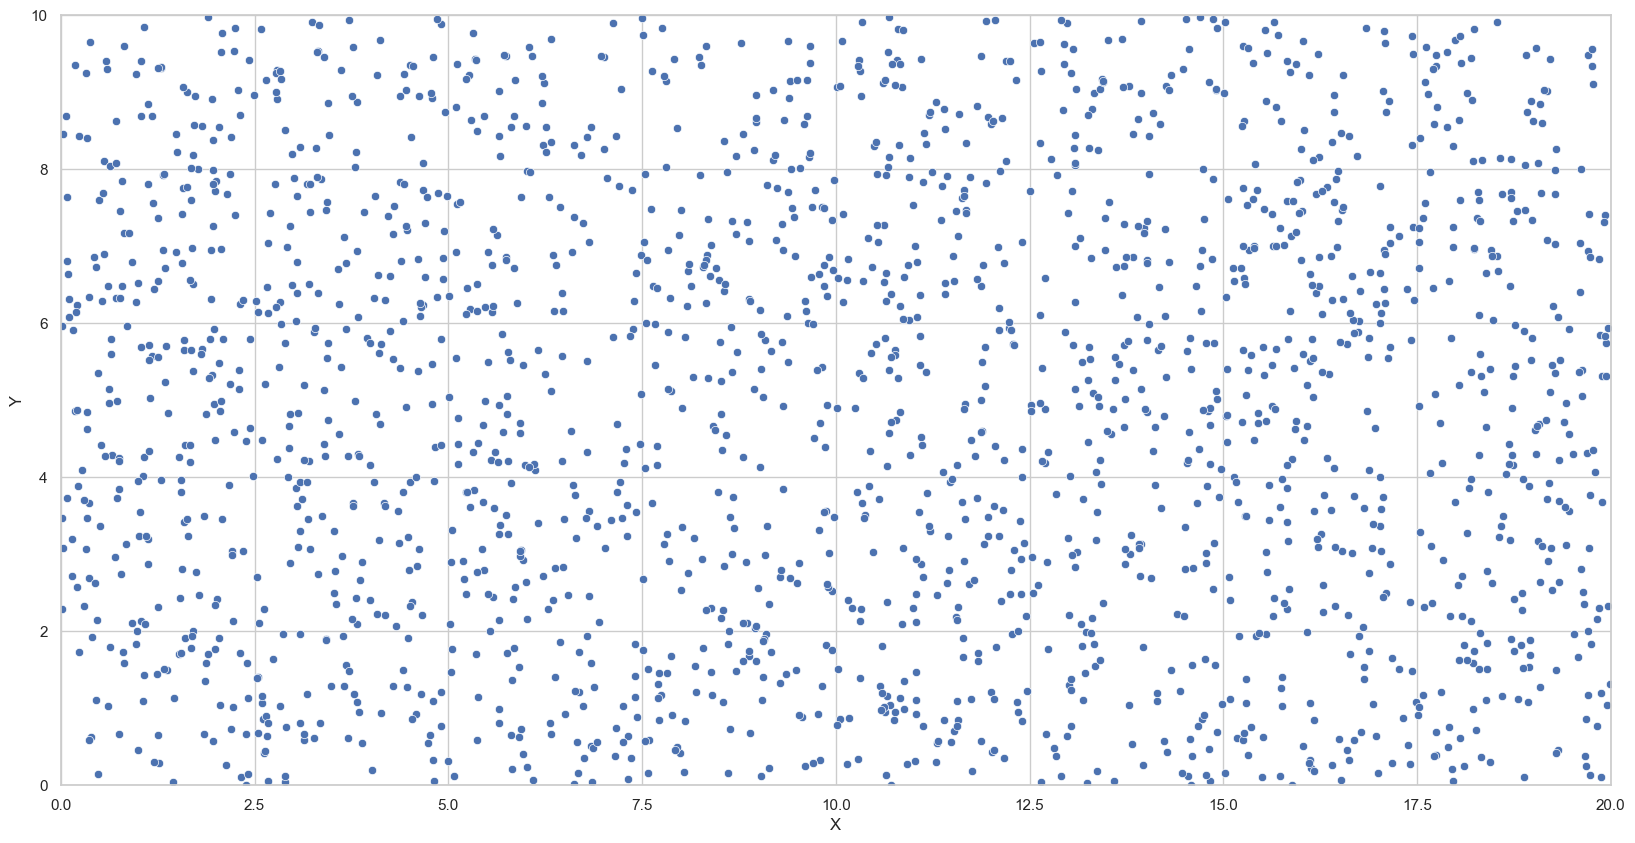

In [9]:
# YOUR CODE HERE
fig, axes = plt.subplots(1,1,figsize=[20,10])
sns.scatterplot(fun2, ax = axes, x = 'X', y = 'Y')
plt.xlim(0,20) 
plt.ylim(0,10)
#raise NotImplementedError()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [10]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    def g(x):
        return -funkcja(x[0], x[1])
    intensity=-sp.optimize.minimize(g, x0=[(x_lim[0]+x_lim[1])/2, (y_lim[0]+y_lim[1])/2], bounds=[x_lim, y_lim]).fun
    poisson = homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim)
    dlugosc = len(poisson)
    
    for i in range(dlugosc):
        prawdopodobienstwo = 1 - (funkcja(poisson['X'][i], poisson['Y'][i])/intensity)
        if prawdopodobienstwo > np.random.uniform(0,1):
            poisson = poisson.drop(i)
    return poisson
    
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [11]:
# YOUR CODE HERE
def funkcja(x,y):
    return x

poisson = unhomogeneous_poisson_on_rectangle(funkcja, [0,20], [0,10])
poisson
#raise NotImplementedError()

,X,Y
0,16.814850,8.521302
2,16.370507,2.002103
6,16.698135,3.616304
7,13.215625,5.961656
8,19.996383,0.026300
...,...,...
4096,10.338729,9.138786
4097,7.306648,5.548151
4099,13.237474,1.977451
4102,15.959756,6.154167


#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

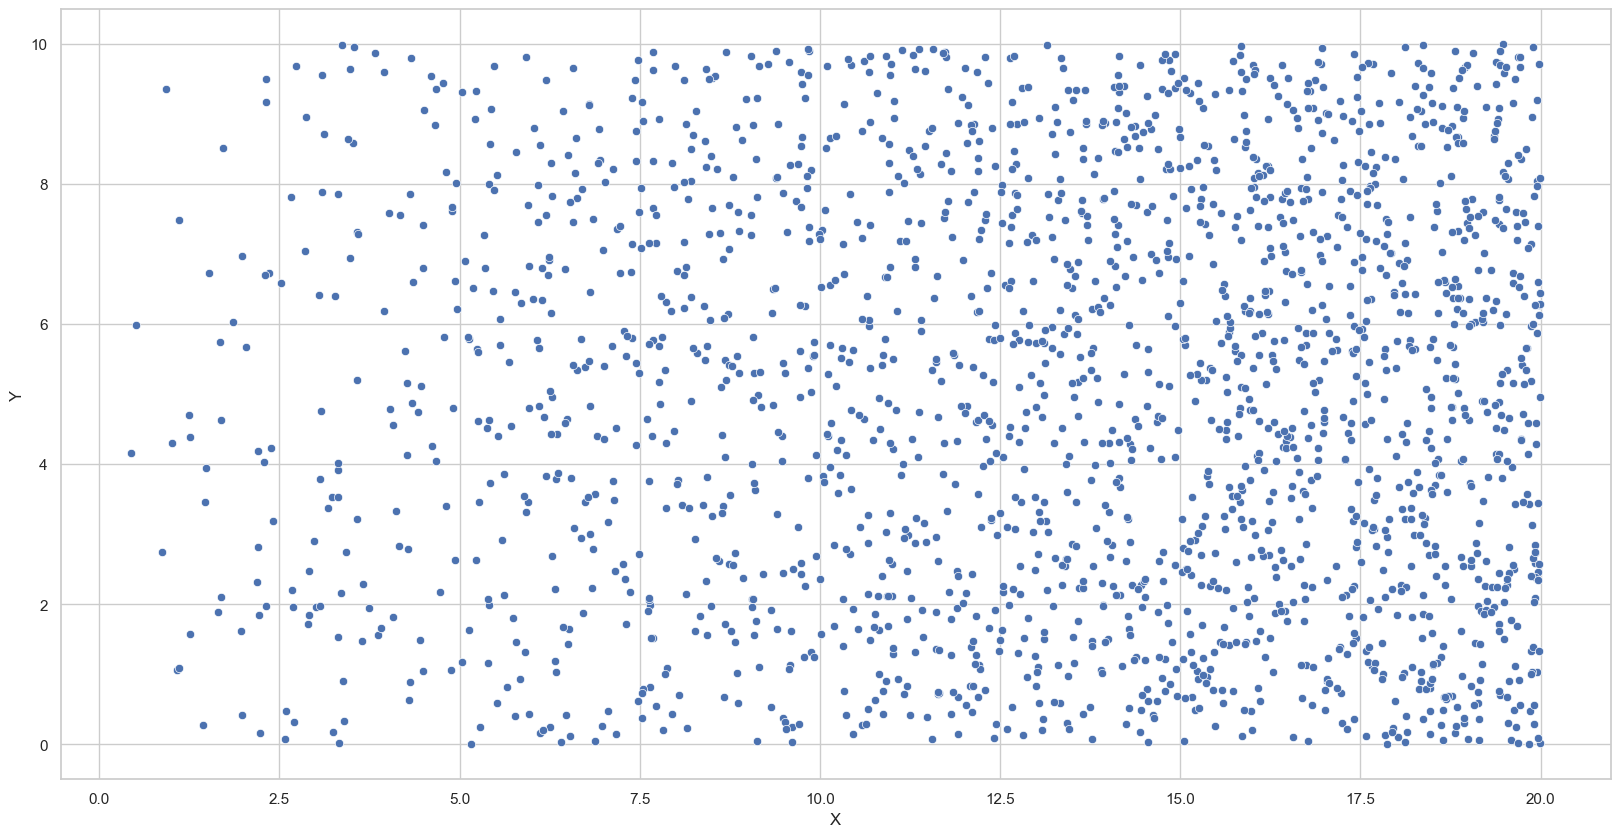

In [12]:
# YOUR CODE HERE
fig, axes = plt.subplots(1,1,figsize= [20,10])
sns.scatterplot(poisson, x = poisson['X'], y = poisson['Y'])
#raise NotImplementedError()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [152]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    x_lim_2 = [x_lim[0] - cluster_radius, x_lim[1] + cluster_radius]
    y_lim_2 = [y_lim[0] - cluster_radius, y_lim[1] + cluster_radius]
    punkty_parent = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_2, y_lim_2)
    x = punkty_parent['X']
    y = punkty_parent['Y']
    koncowe_x = np.array([])
    koncowe_y = np.array([])
    
    for i in range(len(punkty_parent)):
        daughter_poisson = homogeneous_poisson_on_rectangle(daughter_intensity, [x[i]-cluster_radius, x[i]+cluster_radius], [y[i]-cluster_radius, y[i]+cluster_radius])
        punkty_X_daughter = daughter_poisson['X']
        punkty_Y_daughter = daughter_poisson['Y']
    
        for j in range(len(daughter_poisson)):
            if ((punkty_X_daughter[j]-x[i])**2 + (punkty_Y_daughter[j]-y[i])**2) > cluster_radius**2:
                punkty_Y_daughter = punkty_Y_daughter.drop(j)
                punkty_X_daughter = punkty_X_daughter.drop(j)
        koncowe_x = np.append(koncowe_x, punkty_X_daughter)
        koncowe_y = np.append(koncowe_y, punkty_Y_daughter)
    XY = {'X' : koncowe_x, 'Y' : koncowe_y}
    punkty = pd.DataFrame(data = XY)
    return punkty
    
    
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [153]:
# YOUR CODE HERE
rozklad_m = materna_on_rectangle(0.2, 20, 1, [0, 20], [0, 10])
rozklad_m
#raise NotImplementedError()

,X,Y
0,17.533950,9.781013
1,17.794323,10.288125
2,17.150998,9.480517
3,17.199959,8.699506
4,17.839618,8.555744
...,...,...
3345,5.655113,7.950505
3346,5.181220,7.887990
3347,6.262662,8.017540
3348,5.928645,8.234243


#### c) Wizualizacja

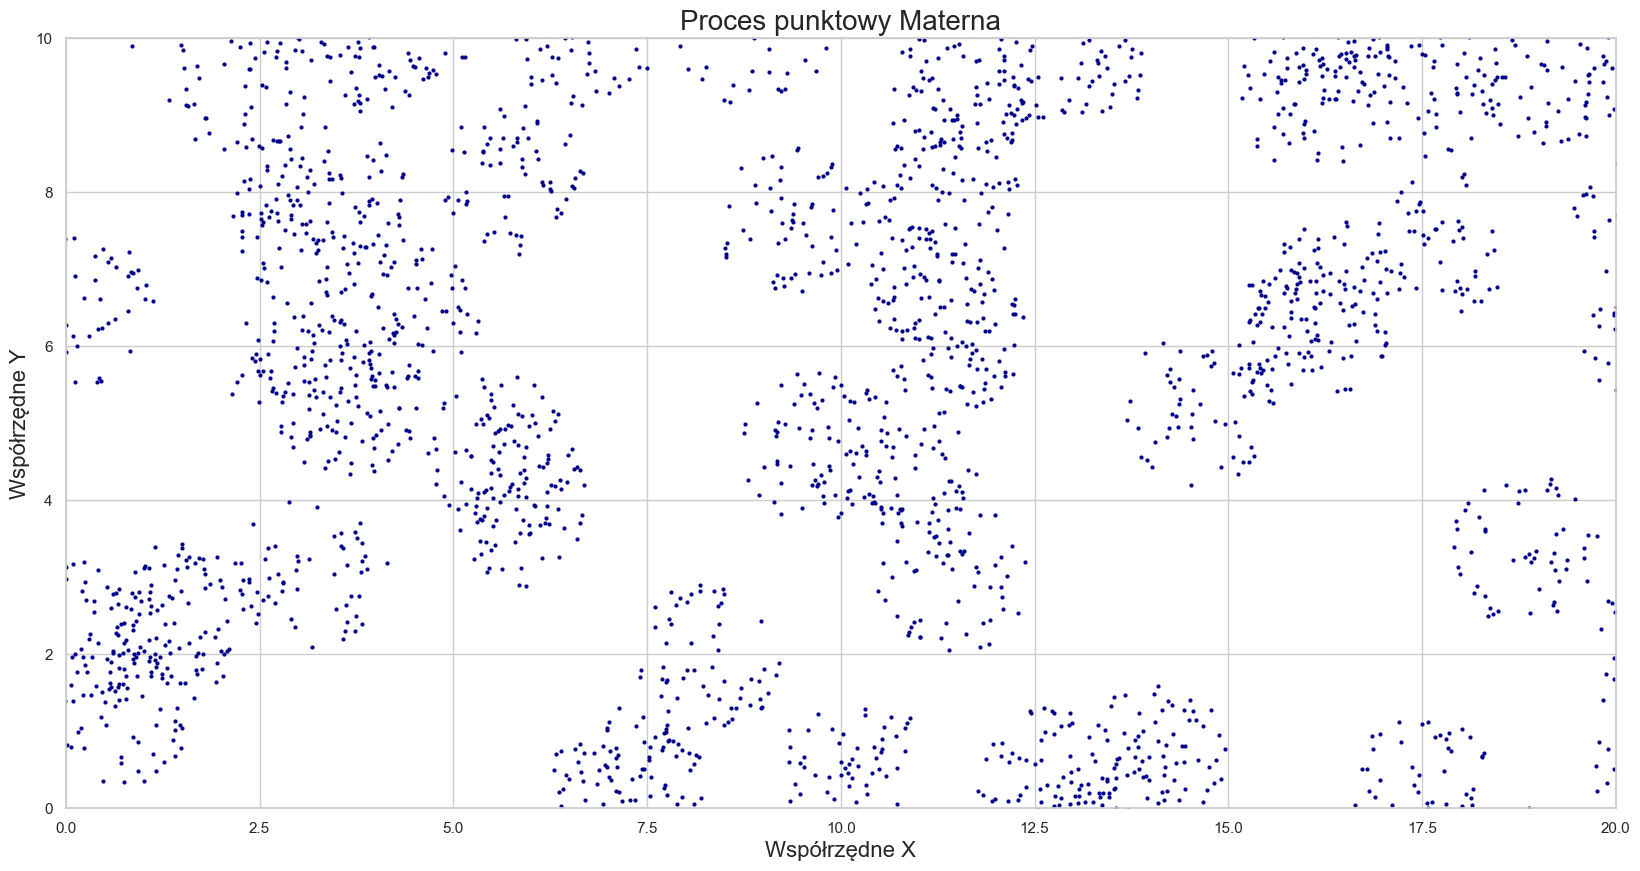

In [154]:
# YOUR CODE HERE
rozklad_m.plot.scatter(x="X", y="Y", s=4, c="darkblue", figsize=(20, 10))
plt.title("Proces punktowy Materna", fontsize=20)
plt.xlabel("Współrzędne X", fontsize=16)
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.ylabel("Współrzędne Y", fontsize=16)
plt.show()
#raise NotImplementedError()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [195]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    x_lim_2 = [0,0]
    y_lim_2 = [0,0]
    x_lim_2[0] = x_lim[0]-4*cluster_sigma
    x_lim_2[1] = x_lim[1]+4*cluster_sigma
    y_lim_2[0] = y_lim[0]-4*cluster_sigma
    y_lim_2[1] = y_lim[1]+4*cluster_sigma
    punkty_poisson = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_2, y_lim_2)
    
    koncowe_x = np.array([])
    koncowe_y = np.array([])
    
    for i in range(len(punkty_poisson)):
        randomowa_liczba_poissona = np.random.poisson(mean_cluster_size)
        losowy_x = np.random.normal(punkty_poisson['X'][i], cluster_sigma, randomowa_liczba_poissona)
        losowy_y = np.random.normal(punkty_poisson['Y'][i], cluster_sigma, randomowa_liczba_poissona)
        koncowe_x = np.append(koncowe_x, losowy_x)
        koncowe_y = np.append(koncowe_y, losowy_y)
    XY = {'X' : koncowe_x, 'Y': koncowe_y}
    punkty = pd.DataFrame(data = XY)
    for i in range(len(punkty)):
        if punkty['X'][i] < x_lim[0] or punkty['X'][i] > x_lim[1] or punkty['Y'][i] < y_lim[0] or punkty['Y'][i] > y_lim[1]:
            punkty.drop(i)
    return punkty

    
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [196]:
# YOUR CODE HERE
rozklad_t = thomas_on_rectangle(0.2, 30, 0.5, [0, 20], [0, 10])
rozklad_t
#raise NotImplementedError()

,X,Y
0,-0.258665,9.576592
1,-1.116852,10.546192
2,-0.622803,9.973738
3,-1.021538,9.741191
4,-0.302710,10.371794
...,...,...
1922,10.754072,1.181880
1923,10.455334,1.351555
1924,11.559869,1.026847
1925,11.432623,0.853905


#### c) Wizualizacja

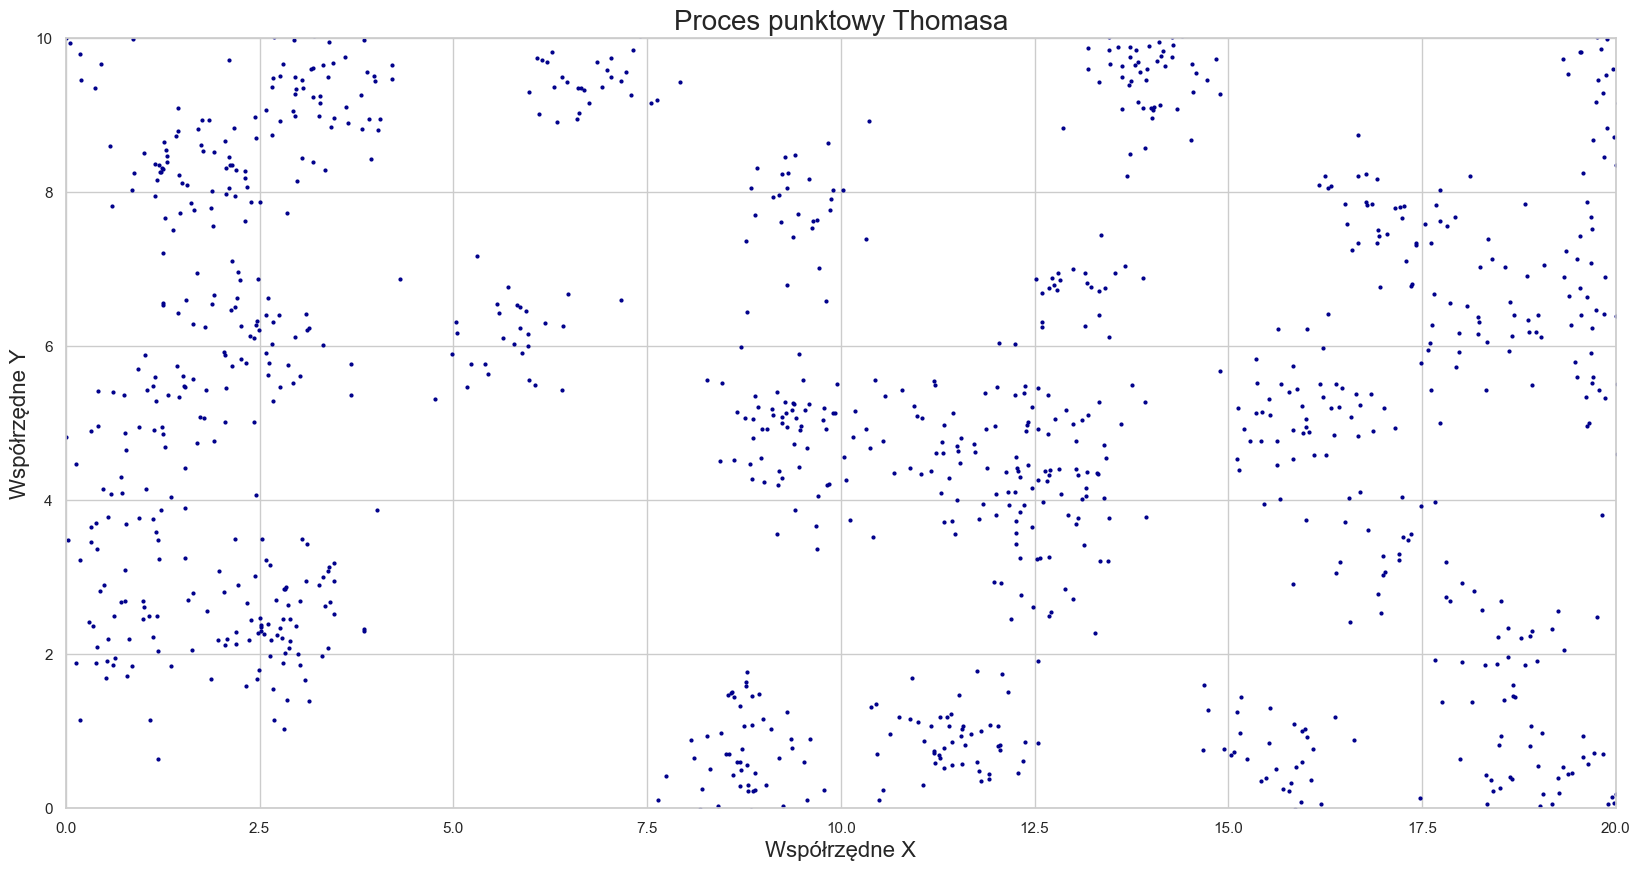

In [197]:
# YOUR CODE HERE
rozklad_t.plot.scatter(x="X", y="Y", s=4, c="darkblue", figsize=(20, 10))
plt.title("Proces punktowy Thomasa", fontsize=20)
plt.xlabel("Współrzędne X", fontsize=16)
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.ylabel("Współrzędne Y", fontsize=16)
plt.show()
#raise NotImplementedError()